# <b>Exploring NBA Advanced Stats with Correlation Analysis</b>
Welcome to my NBA Stats analysis! My objective is to explore team advanced stats and which stats have the highest correlation with one another. In particular, I am looking for which stats affect win percentage and game attendance the most. 
<br><br>
My first hypothesis is that the stats that are most correlated with game attendance are:
<ol><li>win percentage</li>
<li>team</li></ol>
My other hypothesis is that the stats are most correlated with win percentage are:
<ol><li>defensive rating</li>
<li>true shooting</li>
<li>strength of schedule</li></ol>
<br>Let's begin by importing our libraries and reading in our data.

In [351]:
# Importing libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)



In [352]:
# Finding current work directory
pwd = os.getcwd()
pwd

'/Users/solkim/Documents/NBA Stats'

In [357]:
# Reading in data

filepath = pwd + "/Raw Data/Team Summaries.csv"

df = pd.read_csv(filepath)


In [358]:
df.shape

(1783, 31)

## <b>Looking at the data</b>

In [361]:
# Looking at raw data before cleaning/transforming 

df.head()

,season,lg,team,abbreviation,playoffs,age,w,l,pw,pl,mov,sos,srs,o_rtg,d_rtg,n_rtg,pace,f_tr,x3p_ar,ts_percent,e_fg_percent,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,arena,attend,attend_g
0,2022,NBA,Atlanta Hawks,ATL,False,26.1,43.0,39.0,45.0,37.0,1.56,-0.01,1.55,116.5,114.9,1.6,97.7,0.253,0.390,0.581,0.543,10.8,23.0,0.205,0.543,11.5,76.9,0.177,State Farm Arena,672742.0,16408.0
1,2022,NBA,Boston Celtics,BOS,False,26.1,51.0,31.0,59.0,23.0,7.28,-0.26,7.02,114.4,106.9,7.5,96.6,0.239,0.425,0.578,0.542,12.4,24.0,0.195,0.502,12.5,77.3,0.183,TD Garden,727928.0,17754.0
2,2022,NBA,Brooklyn Nets,BRK,False,29.1,44.0,38.0,43.0,39.0,0.78,0.04,0.82,113.6,112.8,0.8,99.0,0.246,0.359,0.576,0.540,12.5,23.9,0.198,0.521,11.7,75.1,0.201,Barclays Center,711539.0,17355.0
3,2022,NBA,Chicago Bulls,CHI,False,26.3,46.0,36.0,40.0,42.0,-0.39,0.02,-0.38,113.2,113.6,-0.4,98.3,0.248,0.332,0.579,0.541,11.8,20.4,0.201,0.541,11.9,78.3,0.199,United Center,856148.0,20882.0
4,2022,NBA,Charlotte Hornets,CHO,False,25.5,43.0,39.0,42.0,40.0,0.44,0.09,0.53,114.1,113.7,0.4,100.0,0.234,0.418,0.572,0.544,11.6,23.3,0.173,0.544,13.1,74.8,0.187,Spectrum Center,700755.0,17092.0


## <b>Cleaning and Transforming the data</b>
<ol><li>Look for missing data and fill in missing data where possible.</li>
<li>Transform data by adding and removing columns.</li></ol>

In [362]:
# Looking for missing data

for col in df.columns:
    missing_cnt = df[col].isnull().sum()
    print('{} - {}'.format(col, missing_cnt))

# Counts how many values are missing in each column. Looks like we have missing data in mutliple columns.

season - 0
lg - 0
team - 0
abbreviation - 101
playoffs - 0
age - 64
w - 86
l - 86
pw - 1
pl - 1
mov - 1
sos - 1
srs - 1
o_rtg - 53
d_rtg - 53
n_rtg - 134
pace - 53
f_tr - 1
x3p_ar - 443
ts_percent - 1
e_fg_percent - 1
tov_percent - 318
orb_percent - 366
ft_fga - 1
opp_e_fg_percent - 264
opp_tov_percent - 318
opp_drb_percent - 366
opp_ft_fga - 264
arena - 86
attend - 481
attend_g - 879


In [363]:
# Removing all rows with "League Average" in team column because we won't need them
df = df.loc[df["team"] != "League Average"]
df.shape

(1698, 31)

In [364]:
# Removing all rows from seasons before 2001. Focusing on attendance from last 20 years
df = df.loc[df["season"] >= 2001]
df.shape

(656, 31)

In [366]:
# Removing all rows from the 2021 season because game attendance was affected by COVID (may lead to inconsistent correlation analysis)
df = df.loc[df["season"] != 2021]
df.shape

(626, 31)

In [367]:
# Removing columns that aren't important for analysis

df = df.drop(columns= ["lg", "abbreviation"])

In [368]:
df.head()

,season,team,playoffs,age,w,l,pw,pl,mov,sos,srs,o_rtg,d_rtg,n_rtg,pace,f_tr,x3p_ar,ts_percent,e_fg_percent,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,arena,attend,attend_g
0,2022,Atlanta Hawks,False,26.1,43.0,39.0,45.0,37.0,1.56,-0.01,1.55,116.5,114.9,1.6,97.7,0.253,0.390,0.581,0.543,10.8,23.0,0.205,0.543,11.5,76.9,0.177,State Farm Arena,672742.0,16408.0
1,2022,Boston Celtics,False,26.1,51.0,31.0,59.0,23.0,7.28,-0.26,7.02,114.4,106.9,7.5,96.6,0.239,0.425,0.578,0.542,12.4,24.0,0.195,0.502,12.5,77.3,0.183,TD Garden,727928.0,17754.0
2,2022,Brooklyn Nets,False,29.1,44.0,38.0,43.0,39.0,0.78,0.04,0.82,113.6,112.8,0.8,99.0,0.246,0.359,0.576,0.540,12.5,23.9,0.198,0.521,11.7,75.1,0.201,Barclays Center,711539.0,17355.0
3,2022,Chicago Bulls,False,26.3,46.0,36.0,40.0,42.0,-0.39,0.02,-0.38,113.2,113.6,-0.4,98.3,0.248,0.332,0.579,0.541,11.8,20.4,0.201,0.541,11.9,78.3,0.199,United Center,856148.0,20882.0
4,2022,Charlotte Hornets,False,25.5,43.0,39.0,42.0,40.0,0.44,0.09,0.53,114.1,113.7,0.4,100.0,0.234,0.418,0.572,0.544,11.6,23.3,0.173,0.544,13.1,74.8,0.187,Spectrum Center,700755.0,17092.0


In [370]:
# Checking for nulls after removing irrelevant data

for col in df.columns:
    missing_cnt = df[col].isnull().sum()
    print('{} - {}'.format(col, missing_cnt))

# No more null values!

season - 0
team - 0
playoffs - 0
age - 0
w - 0
l - 0
pw - 0
pl - 0
mov - 0
sos - 0
srs - 0
o_rtg - 0
d_rtg - 0
n_rtg - 0
pace - 0
f_tr - 0
x3p_ar - 0
ts_percent - 0
e_fg_percent - 0
tov_percent - 0
orb_percent - 0
ft_fga - 0
opp_e_fg_percent - 0
opp_tov_percent - 0
opp_drb_percent - 0
opp_ft_fga - 0
arena - 0
attend - 0
attend_g - 0


In [372]:
df.head()

,season,team,playoffs,age,w,l,pw,pl,mov,sos,srs,o_rtg,d_rtg,n_rtg,pace,f_tr,x3p_ar,ts_percent,e_fg_percent,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,arena,attend,attend_g
0,2022,Atlanta Hawks,False,26.1,43.0,39.0,45.0,37.0,1.56,-0.01,1.55,116.5,114.9,1.6,97.7,0.253,0.390,0.581,0.543,10.8,23.0,0.205,0.543,11.5,76.9,0.177,State Farm Arena,672742.0,16408.0
1,2022,Boston Celtics,False,26.1,51.0,31.0,59.0,23.0,7.28,-0.26,7.02,114.4,106.9,7.5,96.6,0.239,0.425,0.578,0.542,12.4,24.0,0.195,0.502,12.5,77.3,0.183,TD Garden,727928.0,17754.0
2,2022,Brooklyn Nets,False,29.1,44.0,38.0,43.0,39.0,0.78,0.04,0.82,113.6,112.8,0.8,99.0,0.246,0.359,0.576,0.540,12.5,23.9,0.198,0.521,11.7,75.1,0.201,Barclays Center,711539.0,17355.0
3,2022,Chicago Bulls,False,26.3,46.0,36.0,40.0,42.0,-0.39,0.02,-0.38,113.2,113.6,-0.4,98.3,0.248,0.332,0.579,0.541,11.8,20.4,0.201,0.541,11.9,78.3,0.199,United Center,856148.0,20882.0
4,2022,Charlotte Hornets,False,25.5,43.0,39.0,42.0,40.0,0.44,0.09,0.53,114.1,113.7,0.4,100.0,0.234,0.418,0.572,0.544,11.6,23.3,0.173,0.544,13.1,74.8,0.187,Spectrum Center,700755.0,17092.0


In [207]:
# Looking at data types for columns

df.dtypes

season                int64
lg                   object
team                 object
abbreviation         object
playoffs               bool
age                 float64
w                   float64
l                   float64
pw                  float64
pl                  float64
mov                 float64
sos                 float64
srs                 float64
o_rtg               float64
d_rtg               float64
n_rtg               float64
pace                float64
f_tr                float64
x3p_ar              float64
ts_percent          float64
e_fg_percent        float64
tov_percent         float64
orb_percent         float64
ft_fga              float64
opp_e_fg_percent    float64
opp_tov_percent     float64
opp_drb_percent     float64
opp_ft_fga          float64
arena                object
attend              float64
attend_g            float64
dtype: object

In [373]:
# Changing column data types
df['w'] = df['w'].astype('int8')
df['l'] = df['l'].astype('int8')


# Renaming columns
df.rename(columns={'w': 'wins', 'l': 'losses'}, inplace=True)


In [397]:
# Creating new column (win percentage) because some seasons had less games than normal making the column "wins" less accurate for analysis
df.insert(8, "w_percent", round(df['wins']/(df['wins']+df['losses']),2), True)

In [375]:
df.head()

,season,team,playoffs,age,wins,losses,pw,pl,w_percent,mov,sos,srs,o_rtg,d_rtg,n_rtg,pace,f_tr,x3p_ar,ts_percent,e_fg_percent,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,arena,attend,attend_g
0,2022,Atlanta Hawks,False,26.1,43,39,45.0,37.0,0.52,1.56,-0.01,1.55,116.5,114.9,1.6,97.7,0.253,0.390,0.581,0.543,10.8,23.0,0.205,0.543,11.5,76.9,0.177,State Farm Arena,672742.0,16408.0
1,2022,Boston Celtics,False,26.1,51,31,59.0,23.0,0.62,7.28,-0.26,7.02,114.4,106.9,7.5,96.6,0.239,0.425,0.578,0.542,12.4,24.0,0.195,0.502,12.5,77.3,0.183,TD Garden,727928.0,17754.0
2,2022,Brooklyn Nets,False,29.1,44,38,43.0,39.0,0.54,0.78,0.04,0.82,113.6,112.8,0.8,99.0,0.246,0.359,0.576,0.540,12.5,23.9,0.198,0.521,11.7,75.1,0.201,Barclays Center,711539.0,17355.0
3,2022,Chicago Bulls,False,26.3,46,36,40.0,42.0,0.56,-0.39,0.02,-0.38,113.2,113.6,-0.4,98.3,0.248,0.332,0.579,0.541,11.8,20.4,0.201,0.541,11.9,78.3,0.199,United Center,856148.0,20882.0
4,2022,Charlotte Hornets,False,25.5,43,39,42.0,40.0,0.52,0.44,0.09,0.53,114.1,113.7,0.4,100.0,0.234,0.418,0.572,0.544,11.6,23.3,0.173,0.544,13.1,74.8,0.187,Spectrum Center,700755.0,17092.0


## <b>Basic Visualizations</b>
Let's begin plotting the data to make it more visual.

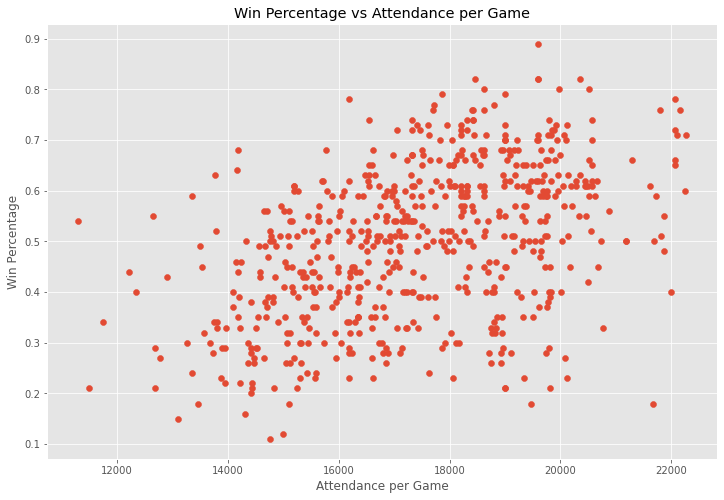

In [376]:
# Hypothesis: As win percentage increases, so does attendance per game
# Creating scatter plot of attendance per game vs win percentage

plt.scatter(x=df['attend_g'], y=df['w_percent'])
plt.title('Win Percentage vs Attendance per Game')
plt.xlabel('Attendance per Game')
plt.ylabel('Win Percentage')
plt.show()



<AxesSubplot:xlabel='attend_g', ylabel='w_percent'>

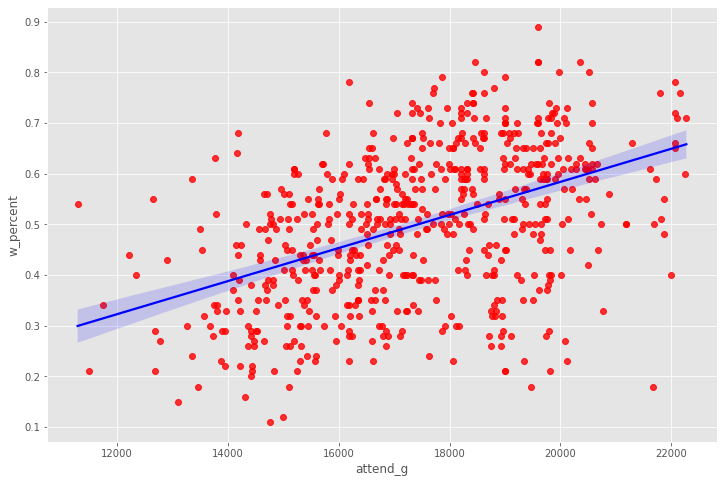

In [377]:
# Plotting win percentage vs attendance per game using seaborn
sns.regplot(x='attend_g', y='w_percent', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

# Positive correlation

## <b>Correlation Analysis</b>
Let's find the correlation measures for all advanced stats and then plot them in a heat map to make it easier to visualize. <br>
After creating a heat map, we'll clean the correlation numbers by removing diagonal correlations that are equal to 1 and removing duplicate correlations. <br>Once we remove duplicates, we can filter the correlation numbers to focus on a particular stat and order in descending order.

In [378]:
# Finding correlation. Lots of numbers and hard to read.
df.corr()


,season,playoffs,age,wins,losses,pw,pl,w_percent,mov,sos,srs,o_rtg,d_rtg,n_rtg,pace,f_tr,x3p_ar,ts_percent,e_fg_percent,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,attend,attend_g
season,1.000000,-0.100667,-0.183531,-0.036845,-0.037124,-0.039397,-0.036434,-0.001943,-0.002456,-0.002271,-0.002722,0.476094,0.498969,-0.002582,0.720845,-0.543614,0.798902,0.560970,0.649000,-0.415581,-0.639958,-0.501510,0.694435,-0.393620,0.745177,-0.494924,-0.031983,0.100150
playoffs,-0.100667,1.000000,0.438758,0.754788,-0.757053,0.733724,-0.735307,0.769315,0.733200,-0.340511,0.721435,0.348409,-0.555509,0.735970,-0.119458,0.167115,0.020211,0.309486,0.266331,-0.161460,0.024879,0.190338,-0.449351,0.184567,0.116865,-0.105846,0.319284,0.372571
age,-0.183531,0.438758,1.000000,0.521296,-0.499191,0.492848,-0.469582,0.519234,0.487068,-0.168425,0.484444,0.182327,-0.419142,0.488078,-0.239332,0.083137,-0.034702,0.198459,0.168742,-0.113950,-0.083793,0.108323,-0.378435,0.072949,0.018092,-0.112798,0.331579,0.339977
wins,-0.036845,0.754788,0.521296,1.000000,-0.942703,0.971900,-0.912189,0.985226,0.955386,-0.306807,0.952304,0.606536,-0.561320,0.956043,-0.065953,0.134442,0.124755,0.528596,0.480566,-0.290244,0.014942,0.178877,-0.463838,0.081901,0.192558,-0.192724,0.467748,0.446205
losses,-0.037124,-0.757053,-0.499191,-0.942703,1.000000,-0.913680,0.971470,-0.982570,-0.951564,0.311312,-0.947963,-0.610225,0.552954,-0.952416,0.026427,-0.078009,-0.177417,-0.541439,-0.505050,0.288903,0.013303,-0.122259,0.432470,-0.083526,-0.224237,0.248162,-0.324180,-0.449341
pw,-0.039397,0.733724,0.492848,0.971900,-0.913680,1.000000,-0.939758,0.956275,0.982106,-0.318491,0.978670,0.617980,-0.583818,0.983623,-0.059476,0.142671,0.131605,0.534497,0.485532,-0.292528,0.024102,0.186752,-0.475386,0.095807,0.205124,-0.192141,0.453214,0.427828
pl,-0.036434,-0.735307,-0.469582,-0.912189,0.971470,-0.939758,1.000000,-0.952578,-0.977626,0.322949,-0.973657,-0.621366,0.574959,-0.979349,0.018864,-0.084778,-0.185534,-0.547289,-0.510286,0.290942,0.004797,-0.128631,0.442951,-0.097506,-0.237532,0.248812,-0.305584,-0.430564
w_percent,-0.001943,0.769315,0.519234,0.985226,-0.982570,0.956275,-0.952578,1.000000,0.969171,-0.309719,0.966172,0.616106,-0.568325,0.969644,-0.047968,0.109816,0.149209,0.541713,0.498652,-0.291603,0.003437,0.154379,-0.457957,0.084710,0.210995,-0.221875,0.402229,0.454922
mov,-0.002456,0.733200,0.487068,0.955386,-0.951564,0.982106,-0.977626,0.969171,1.000000,-0.324982,0.996423,0.632642,-0.587862,0.999101,-0.035617,0.113505,0.159134,0.553924,0.510166,-0.291329,0.011752,0.158838,-0.469225,0.093969,0.222899,-0.218033,0.381136,0.431006
sos,-0.002271,-0.340511,-0.168425,-0.306807,0.311312,-0.318491,0.322949,-0.309719,-0.324982,1.000000,-0.243907,-0.079790,0.323035,-0.325484,0.095083,-0.026493,-0.065318,-0.092113,-0.087300,0.080669,0.078797,-0.026270,0.230956,-0.141283,-0.132122,0.032253,-0.148712,-0.162507


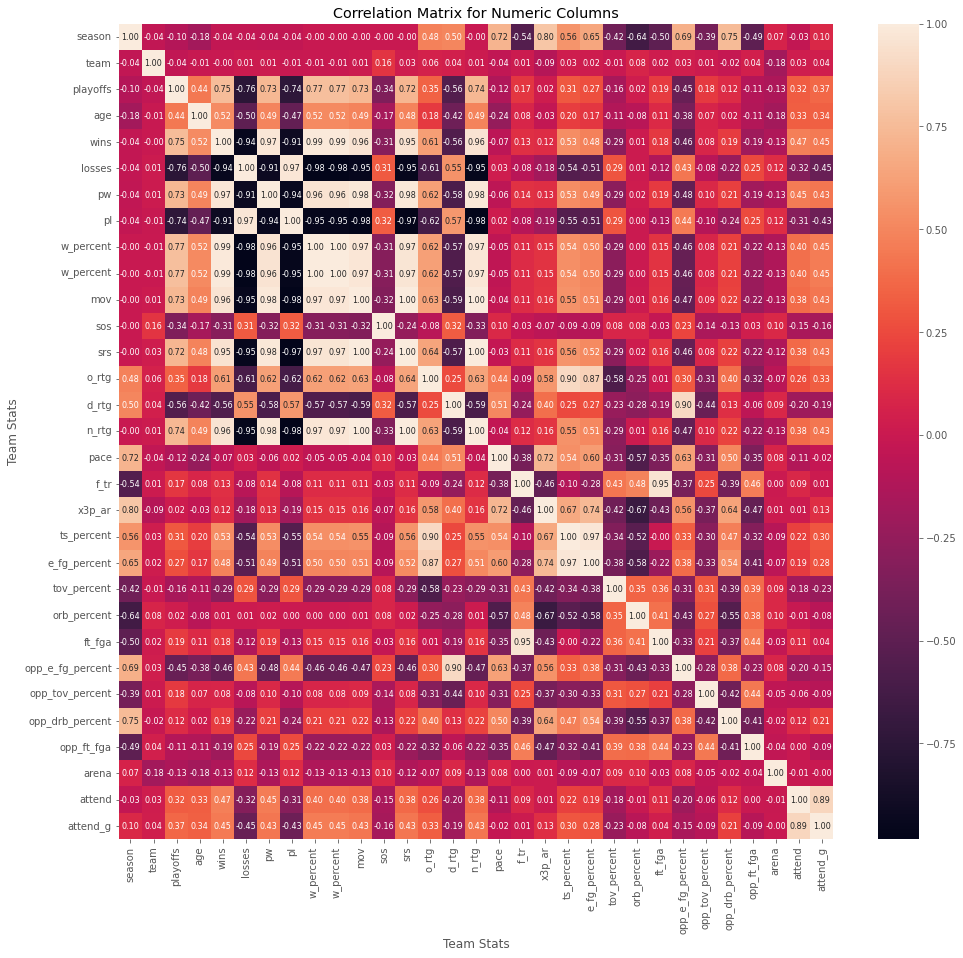

In [400]:
#Creating a correlation matrix heat map to make it easier to view

plt.figure(figsize=(16, 15))
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot=True, annot_kws={"size": 8}, fmt=".2f")
plt.title('Correlation Matrix for Numeric Columns')
plt.xlabel('Team Stats')
plt.ylabel('Team Stats')
plt.show()

# Win percentage has a relatively strong correlation with attendance per game, along with other factors like net rating.
# The better the team in terms of winning games and success, the higher the attendance generally

In [380]:
# The heat map above only shows numberical columns, not object type columns

# Converting object type columns into numerical columns so we can find correlation with those columns too
df_num = df

for col_name in df_num.columns:
    if(df_num[col_name].dtype == 'object'):
        df_num[col_name] = df_num[col_name].astype('category')
        df_num[col_name] = df_num[col_name].cat.codes

df_num.head(10)

,season,team,playoffs,age,wins,losses,pw,pl,w_percent,mov,sos,srs,o_rtg,d_rtg,n_rtg,pace,f_tr,x3p_ar,ts_percent,e_fg_percent,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,arena,attend,attend_g
0,2022,0,False,26.1,43,39,45.0,37.0,0.52,1.56,-0.01,1.55,116.5,114.9,1.6,97.7,0.253,0.390,0.581,0.543,10.8,23.0,0.205,0.543,11.5,76.9,0.177,62,672742.0,16408.0
1,2022,1,False,26.1,51,31,59.0,23.0,0.62,7.28,-0.26,7.02,114.4,106.9,7.5,96.6,0.239,0.425,0.578,0.542,12.4,24.0,0.195,0.502,12.5,77.3,0.183,64,727928.0,17754.0
2,2022,2,False,29.1,44,38,43.0,39.0,0.54,0.78,0.04,0.82,113.6,112.8,0.8,99.0,0.246,0.359,0.576,0.540,12.5,23.9,0.198,0.521,11.7,75.1,0.201,12,711539.0,17355.0
3,2022,5,False,26.3,46,36,40.0,42.0,0.56,-0.39,0.02,-0.38,113.2,113.6,-0.4,98.3,0.248,0.332,0.579,0.541,11.8,20.4,0.201,0.541,11.9,78.3,0.199,73,856148.0,20882.0
4,2022,4,False,25.5,43,39,42.0,40.0,0.52,0.44,0.09,0.53,114.1,113.7,0.4,100.0,0.234,0.418,0.572,0.544,11.6,23.3,0.173,0.544,13.1,74.8,0.187,61,700755.0,17092.0
5,2022,6,False,24.7,44,38,47.0,35.0,0.54,2.12,-0.08,2.04,111.9,109.7,2.2,96.1,0.261,0.387,0.571,0.538,13.2,24.0,0.198,0.520,12.3,76.5,0.172,54,758228.0,18493.0
6,2022,7,False,26.7,52,30,50.0,32.0,0.63,3.30,-0.18,3.12,112.8,109.4,3.4,95.4,0.249,0.439,0.572,0.538,11.7,21.3,0.192,0.521,12.2,78.0,0.185,5,808037.0,19708.0
7,2022,8,False,27.7,48,34,47.0,35.0,0.59,2.30,-0.15,2.16,114.5,112.1,2.4,97.8,0.244,0.416,0.590,0.556,13.2,21.9,0.194,0.537,11.7,78.3,0.188,10,695262.0,16958.0
8,2022,9,False,23.6,23,59,22.0,60.0,0.28,-7.72,0.37,-7.36,106.0,113.8,-7.8,98.4,0.249,0.391,0.533,0.494,12.6,23.4,0.194,0.541,13.1,75.6,0.226,37,663556.0,16184.0
9,2022,10,False,27.6,53,29,55.0,27.0,0.65,5.54,-0.02,5.52,112.5,106.9,5.6,98.4,0.235,0.456,0.582,0.552,13.5,22.8,0.181,0.509,13.0,78.7,0.201,17,740624.0,18064.0


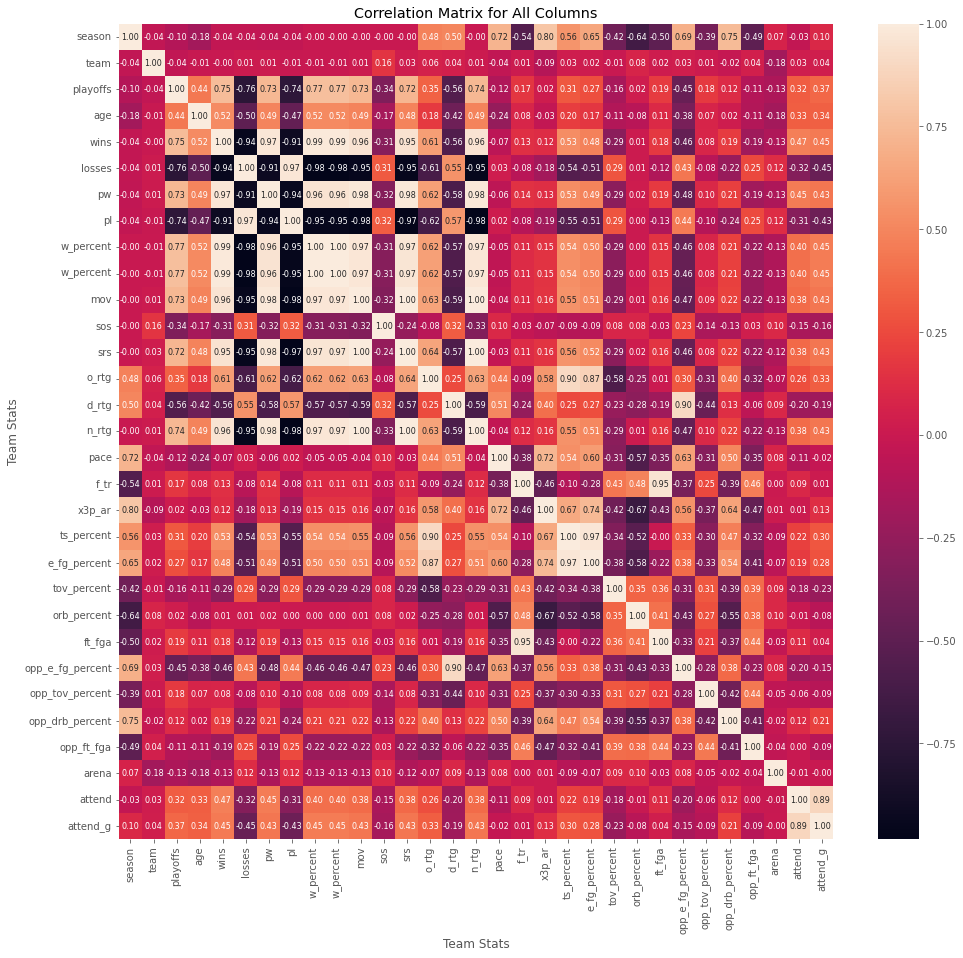

In [401]:
# Creating heat map with all categories including non-numerical objects
plt.figure(figsize=(16, 15))
corr_matrix = df_num.corr()
sns.heatmap(corr_matrix, annot=True, annot_kws={"size": 8}, fmt=".2f")
plt.title('Correlation Matrix for All Columns')
plt.xlabel('Team Stats')
plt.ylabel('Team Stats')
plt.show()

In [382]:
# Filtering out diagonal duplicates in matrix
dataCorr = df_num.corr()
dataCorr = dataCorr[abs(dataCorr) >= 0.01].stack().reset_index()
dataCorr = dataCorr[dataCorr['level_0'].astype(str)!=dataCorr['level_1'].astype(str)]
 
# Filtering out lower/upper triangular duplicates 
dataCorr['ordered-cols'] = dataCorr.apply(lambda x: '-'.join(sorted([x['level_0'],x['level_1']])),axis=1)
dataCorr = dataCorr.drop_duplicates(['ordered-cols'])
dataCorr.drop(['ordered-cols'], axis=1, inplace=True)
 
#Showing 10 highest correlation of pairwaise attributes 
dataCorr.sort_values(by=[0], ascending=False).head(10) 


,level_0,level_1,0
264,mov,n_rtg,0.999101
261,mov,srs,0.996423
322,srs,n_rtg,0.995459
115,wins,w_percent,0.985226
180,pw,n_rtg,0.983623
175,pw,mov,0.982106
177,pw,srs,0.978670
113,wins,pw,0.971900
143,losses,pl,0.971470
533,ts_percent,e_fg_percent,0.970735


In [395]:
# Filtering correlation matrix for high correlation pairs (correlation >= 0.4 or <= -0.7) for pairs including attendance per game
high_corr_attend_g = dataCorr.loc[((dataCorr["level_0"] == "attend_g") | (dataCorr["level_1"] == "attend_g")) & ((dataCorr[0] >= .4)|(dataCorr[0] <= -.7))]
high_corr_attend_g.sort_values(by=[0], ascending=False)

,level_0,level_1,0
831,attend,attend_g,0.886679
250,w_percent,attend_g,0.454922
136,wins,attend_g,0.446205
425,n_rtg,attend_g,0.433922
279,mov,attend_g,0.431006
195,pw,attend_g,0.427828
337,srs,attend_g,0.427403


In [396]:
# Filtering correlation matrix for high correlation pairs for pairs including win percentage
high_corr_w_percent = dataCorr.loc[((dataCorr["level_0"] == "w_percent") | (dataCorr["level_1"] == "w_percent")) & ((dataCorr[0] >= .5)|(dataCorr[0] <= -.5))]
high_corr_w_percent.sort_values(by=[0], ascending=False)

,level_0,level_1,0
115,wins,w_percent,0.985226
236,w_percent,n_rtg,0.969644
231,w_percent,mov,0.969171
233,w_percent,srs,0.966172
174,pw,w_percent,0.956275
57,playoffs,w_percent,0.769315
234,w_percent,o_rtg,0.616106
240,w_percent,ts_percent,0.541713
86,age,w_percent,0.519234
235,w_percent,d_rtg,-0.568325


## <b>Conclusion</b>
<b>Note:</b> I ignore pairs with correlation measures above .9 or less than -.9 because those stats are very similar measures.<br><br>
### <b>Attendance per Game</b>
Let's begin by looking at the correlation measures related to attendance per game.<br><br>
In terms of my initial hypothesis, I was correct about win percentage having one of the highest correlations with attendance per game. In fact, besides the number of wins themselves, win percentage had a measure of 0.454 which was the highest. I was wrong about the team being correlated with attendance, which was measured at 0.03 or basically no correlation at all.<br><br>
<b>Net rating</b>, <b>margin of victory</b> (how many points on average a team scores above/below opposing team), and team <b>simple rating system</b> (team evaluation rating that takes into account average point differential and strength of schedule) were also significant factors. Offensive advanced stats also tend to have higher correlations with attendance than defensive advanced stats. In other words,<b> offense sells tickets and defense doesn't.</b> <br><br>Ultimately, teams that win more and score more points than their opponents on average usually have higher attendance per game which makes sense. <br><br><br>

### <b>Win Percentage</b>
For my second hypothesis, I was correct about <b>true shooting</b> and <b>defensive rating</b> having high correlations with wins. They had correlation measures of 0.54 and -0.56 respectively. For this dataset, those measures are relatively high. Defensive rating is negatively correlated because as the defensive rating goes up, it indicates the team allows more points, meaning the defense gets worse. However, offensive rating has a higher absolute value than defensive rating, indicating <b>offense is a little more vital to winning than defense</b>.

<br>I was wrong about strength of schedule which had a correlation measure of -0.31, indicating some relation, but not as much as other stats.
<br> One surprising stat that correlates relatively high with wins is <b>age</b>. Experience and veteran leadership does play an important role in winning games.<br><br><br>

### <b>What would I do if I were a general manager trying to increase team wins and game attendance for next season?</b>
I would focus on signing and trading for players who will help at least maintain our defensive rating from the previous season and who will help increase our offensive ratings, mainly in areas of <b>shooting</b> and <b>low turnover</b> numbers. 